# Task 2 Applying Clustering algorithm and compare which one is best

### Importing and loading pacakages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## EDA process

### Data Collection

In [2]:
df=pd.read_csv("Steam.csv")

In [3]:
df

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500


### Data Understanding

In [4]:
df.head(10)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
5,Soulmask,30-05-2024,304685,29.99,7540563.0,95.697813,79,Indie,Qooland Games,CampFire Studio,2646460
6,The Universim,22-01-2024,328945,29.99,7534369.0,16.868531,81,Indie,Crytivo,Crytivo,352720
7,Bellwright,23-04-2024,280955,29.99,7481940.0,41.418885,78,Indie,"Donkey Crew,Snail Games USA",Donkey Crew,1812450
8,Night of the Dead,31-05-2024,394364,29.99,7091792.0,27.597072,79,Indie,Jackto Studios,Jackto Studios,1377380
9,Empires of the Undergrowth,07-06-2024,408292,29.99,6950952.0,38.602124,95,AA,"Hooded Horse,Slug Disco",Slug Disco,463530


In [5]:
df.describe()

,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId
count,1.500000e+03,1500.000000,1.500000e+03,1500.000000,1500.000000,1.500000e+03
mean,1.414826e+05,17.519513,2.632382e+06,12.562704,76.201333,2.183788e+06
std,1.132757e+06,12.646612,2.781024e+07,21.542173,24.319438,6.067725e+05
min,5.930000e+02,0.000000,2.067400e+04,0.000000,0.000000,2.488000e+04
25%,4.918750e+03,9.990000,4.550425e+04,3.564848,72.000000,1.792795e+06
50%,1.192850e+04,14.990000,1.090530e+05,6.762776,83.000000,2.321985e+06
75%,3.786975e+04,19.990000,4.551568e+05,13.104473,92.000000,2.693228e+06
max,3.073915e+07,99.990000,8.377934e+08,296.332852,100.000000,3.107330e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


In [7]:
df.tail()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500
1499,Peglin,27-08-2024,544144,19.99,8125042.0,30.160995,82,Indie,"Red Nexus Games Inc.,IndieArk",Red Nexus Games Inc.,1296610


In [8]:
df.isnull().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        1
developers        2
steamId           0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [10]:
df.columns

Index(['name', 'releaseDate', 'copiesSold', 'price', 'revenue', 'avgPlaytime',
       'reviewScore', 'publisherClass', 'publishers', 'developers', 'steamId'],
      dtype='object')

In [11]:
df.nunique()

name              1500
releaseDate        235
copiesSold        1460
price               58
revenue           1497
avgPlaytime       1500
reviewScore         72
publisherClass       4
publishers        1131
developers        1406
steamId           1500
dtype: int64

### Data Cleaning

In [12]:
# Fill missing values in 'publishers'and 'developers' column
df['publishers'] = df['publishers'].fillna('Unknown')
df['developers'] = df['developers'].fillna('Unknown')


In [13]:
df.isnull().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
steamId           0
dtype: int64

### Data Transformation

In [14]:
df

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500


In [15]:
df["avgPlaytime"]=df["avgPlaytime"].astype('int')
df["price"]=df["price"].astype('int')
df['revenue']=df['revenue'].astype('int')

In [16]:
df

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99,8055097,42,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59,7882151,29,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49,7815247,12,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19,7756399,24,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59,7629252,34,96,AA,SEGA,ATLUS,1875830
...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,11-04-2024,452146,24,8739530,14,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0,8706135,31,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34,8641459,11,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59,8440898,14,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500


### Data Visualization

<Axes: xlabel='publisherClass', ylabel='reviewScore'>

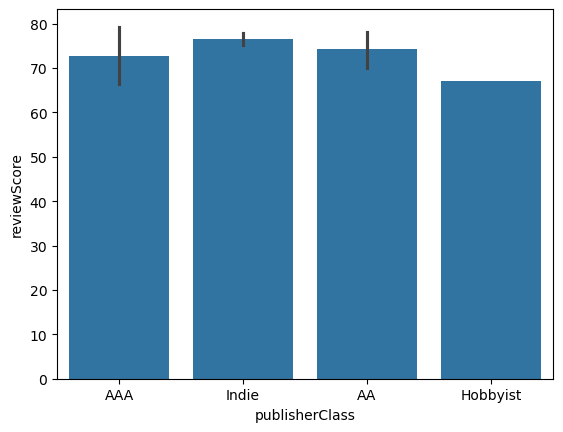

In [17]:
sns.barplot(x='publisherClass',y='reviewScore',data=df)

<Axes: xlabel='price', ylabel='Count'>

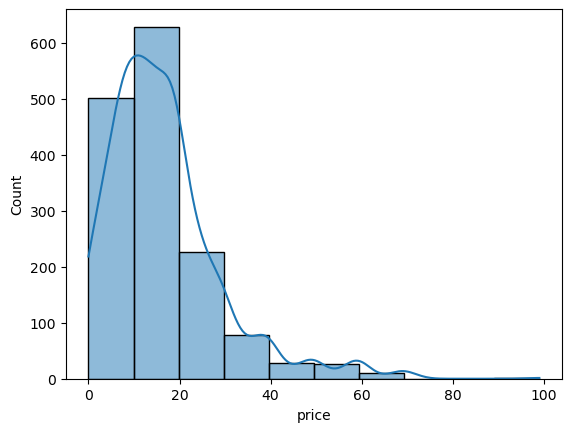

In [18]:
sns.histplot(df['price'],bins=10,kde=True)

### Creating pair plot

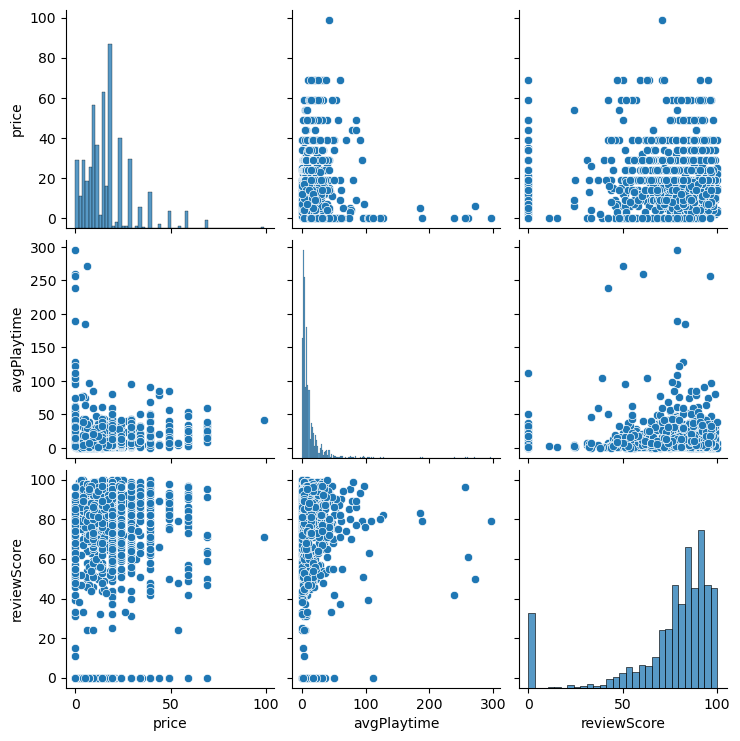

In [19]:
sns.pairplot(df.iloc[:,[3,5,6,7]])

## Using First Algorithm

### Kmeans Clustering

In [20]:
import os

In [21]:
os.environ["OMP_NUM_THREADS"]='6'

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
#Selecting a feature
clustering_data = df[['avgPlaytime', 'revenue']]
#Scaling a Feature
scaler=StandardScaler()
scaled_data=scaler.fit_transform(clustering_data)

In [24]:
#Creating elbow chart to find optimal value
from sklearn.cluster import KMeans

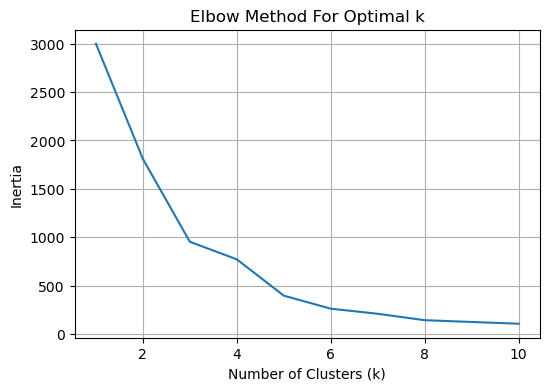

In [25]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters= k,random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(6, 4))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

### Applying Clustering

In [26]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_means = kmeans.fit_predict(scaled_data)
inertia=kmeans.inertia_

### Visualizing Clusters

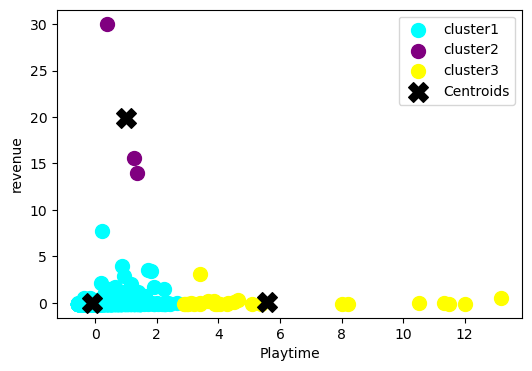

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(scaled_data[y_means==0, 0], scaled_data[y_means==0, 1], s=100, c='cyan', label='cluster1')
plt.scatter(scaled_data[y_means==1, 0], scaled_data[y_means==1, 1], s=100, c='purple', label='cluster2')
plt.scatter(scaled_data[y_means==2, 0], scaled_data[y_means==2, 1], s=100, c='yellow', label='cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids', marker='X')
plt.xlabel('Playtime')
plt.ylabel('revenue')
plt.legend()
plt.show()


## Using Second Algorithm

### Importing required packages again

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Applying Hierachical Clustering

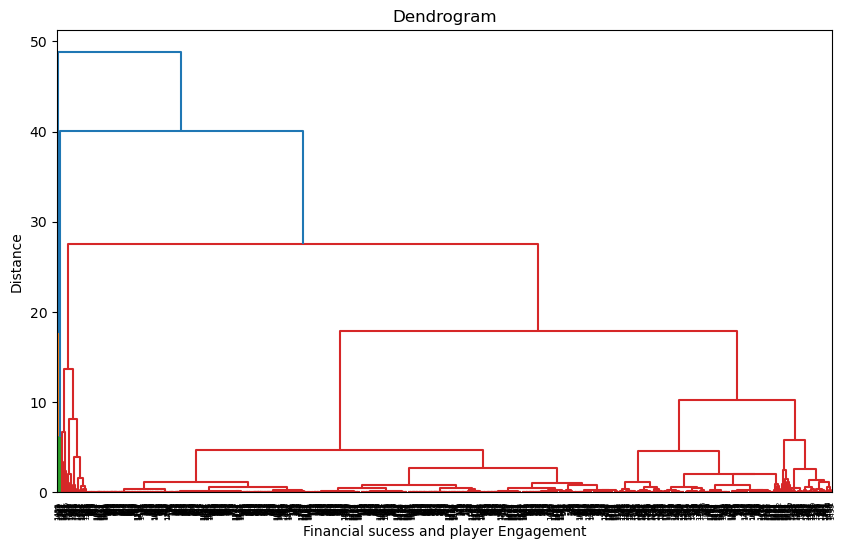

In [29]:

#Using the Dendrogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

#Visualizing the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Financial sucess and player Engagement')
plt.ylabel('Distance')
plt.show()


### Applying Agglomerative Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = agg_cluster.fit_predict(scaled_data)

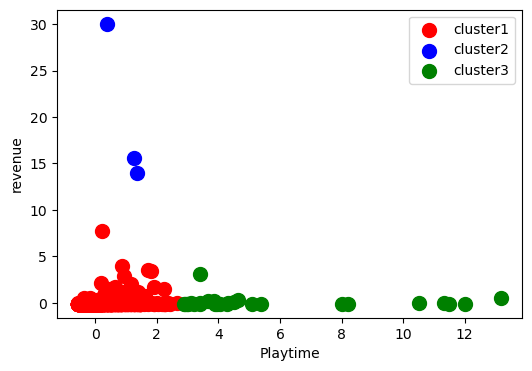

In [31]:
#Visualizing line clusters
plt.figure(figsize=(6, 4))
plt.scatter(scaled_data[y_means==0, 0], scaled_data[y_means==0, 1], s=100, c='red', label='cluster1')
plt.scatter(scaled_data[y_means==1, 0], scaled_data[y_means==1, 1], s=100, c='blue', label='cluster2')
plt.scatter(scaled_data[y_means==2, 0], scaled_data[y_means==2, 1], s=100, c='green', label='cluster3')


plt.xlabel('Playtime')
plt.ylabel('revenue')
plt.legend()
plt.show()

## Comparing two performance of algorithm 

In [32]:
# Importing required packages
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Silhouette Score
kmeans_silhouette = silhouette_score(scaled_data, y_means)
agglo_silhouette = silhouette_score(scaled_data, cluster_labels)

# Davies-Bouldin Score
kmeans_db_score = davies_bouldin_score(scaled_data, y_means)
agglo_db_score = davies_bouldin_score(scaled_data, cluster_labels)

# Displaying results in a DataFrame
results = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Score'],
    'KMeans': [ kmeans_silhouette, kmeans_db_score],
    'Agglomerative': [agglo_silhouette, agglo_db_score]
})

print("Performance Comparison:")
print(results)

Performance Comparison:
                 Metric    KMeans  Agglomerative
0      Silhouette Score  0.893101       0.937599
1  Davies-Bouldin Score  0.518587       0.371303


# RESULT OF COMPARISION

## Silhouette Score

In [33]:
# A higher silhouette score (closer to 1) indicates that clusters are well-separated and dense. 
# The Agglomerative Clustering silhouette score is higher than Kmeans , it means Agglomerative Clustering has done a better job at clustering the data.

## Davies-Bouldin score

In [34]:
# A lower Davies-Bouldin score indicates better clustering with well-separated and compact clusters. 
# Comparing this value for both algorithms can help us assess which algorithm created more distinct clusters.

# CONCLUSION

In [42]:
# After considering  Silhouette Score, Davies-Bouldin score AGGLOMERATIVE CLUSTERING has done a better job comparable to KMeans